<a href="https://colab.research.google.com/github/kamilasouzac/Analise_Carrinho_de_Compras/blob/main/An%C3%A1lise_Carrinho_de_Compras_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DATASET E O PROBLEMA DE NEGÓCIO**

##Dataset

O dataset usado no projeto pode ser encontrado em: https://www.kaggle.com/datasets/mittalvasu95/the-bread-basket

##O problema de negócio

Neste projeto, vamos investigar nossos dados para responder algumas perguntas frequentes no varejo:

1. Quais são os itens mais vendidos?
2. Quais items podem ser removidos do cardápio para dar espaço para novos pratos?
3. Qual período do dia a padaria mais vende?
4. O movimento no final de semana é maior do que durante a semana?
5. Existe alguma sazonalidade nas vendas?
6. Quais são os itens mais vendidos em conjunto?
7. Quais combos a padaria pode criar para estimular as vendas?

#**PREPANDANDO O AMBIENTE**

###**Bibliotecas**

Nesta primeira etapa, vamos usar algumas das bibliotecas mais comuns: Pandas, Numpy, Seaborn e Matplotlib:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

É interessante também registrar as versões utilizadas de cada biblioteca:

In [ ]:
print('Versão do Pandas utilizada:', pd.__version__)
print('Versão do Numpy utilizada:', np.__version__)
print('Versão do Seaborn utilizada:', sns.__version__)
print('Versão do Matplotlib utilizada:', matplotlib.__version__)

Versão do Pandas utilizada: 1.5.3
Versão do Numpy utilizada: 1.23.5
Versão do Seaborn utilizada: 0.12.2
Versão do Matplotlib utilizada: 3.7.1


Na versão do pandas utilizada, eu estava recebendo a mensagem de erro abaixo:

 > /usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

O código abaixo foi a sulução para resolvermos o erro.

In [ ]:
pip install --upgrade ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.2/154.2 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.3 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.25.2 which is incompatible.


###Parâmetros dos gráficos

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6) #Tamanho do gráfico
sns.set_theme(style = 'whitegrid', palette = 'plasma')

#**IMPORTANDO E TRATANDO O DATASET**

##Importar a base de dados

In [ ]:
df = pd.read_csv("/content/bread basket.csv")

In [ ]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [ ]:
#Conhecendo as colunas do df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [ ]:
print('Quantidade de linhas e colunas:', df.shape)
print('Quantidade de dados nulos:', df.isna().sum().sum())

Quantidade de linhas e colunas: (20507, 5)
Quantidade de dados nulos: 0


##Ajustando coluna tempo

Transformaremos a coluna 'Data' de *object* para *datetime*, para trabalharmos as informações de data.

In [ ]:
df['Carimbo_data'] = pd.to_datetime(df['date_time'])

In [ ]:
df.dtypes

Transaction                 int64
Item                       object
date_time                  object
period_day                 object
weekday_weekend            object
Carimbo_data       datetime64[ns]
dtype: object

Com a coluna no formato datetime, podemos extrair maior granulariade das informações. Criaremos novas colunas com o dia da semana, mês e ano.

In [ ]:
#Criar nova coluna com data completa

df['Data'] = df['Carimbo_data'].dt.date

In [ ]:
#Criar nova coluna com o nome dos dia da semana

df['Dia'] = df['Carimbo_data'].dt.day_name()

In [ ]:
#Criar nova coluna com o nome dos meses

df['Mês'] = df['Carimbo_data'].dt.month_name()

In [ ]:
#Criar nova coluna com o ano

df['Ano'] = df['Carimbo_data'].dt.year

In [ ]:
#Criar coluna com horário

df['Hora'] = df['Carimbo_data'].dt.hour

In [ ]:
# Função para extrair hora e minutos em uma mesma coluna
def extrair_hora_minuto(dt):
    return f"{dt.hour:02d}:{dt.minute:02d}"

# Criar a nova coluna combinando hora e minutos
df['Hora_Completa'] = df['Carimbo_data'].apply(extrair_hora_minuto)

In [ ]:
#Removendo a coluna date_time

df.drop('date_time', axis=1, inplace = True)

In [ ]:
df.head()

,Transaction,Item,period_day,weekday_weekend,Carimbo_data,Data,Dia,Mês,Ano,Hora,Hora_Completa
0,1,Bread,morning,weekend,2016-10-30 09:58:00,2016-10-30,Sunday,October,2016,9,09:58
1,2,Scandinavian,morning,weekend,2016-10-30 10:05:00,2016-10-30,Sunday,October,2016,10,10:05
2,2,Scandinavian,morning,weekend,2016-10-30 10:05:00,2016-10-30,Sunday,October,2016,10,10:05
3,3,Hot chocolate,morning,weekend,2016-10-30 10:07:00,2016-10-30,Sunday,October,2016,10,10:07
4,3,Jam,morning,weekend,2016-10-30 10:07:00,2016-10-30,Sunday,October,2016,10,10:07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Transaction      20507 non-null  int64         
 1   Item             20507 non-null  object        
 2   period_day       20507 non-null  object        
 3   weekday_weekend  20507 non-null  object        
 4   Carimbo_data     20507 non-null  datetime64[ns]
 5   Data             20507 non-null  object        
 6   Dia              20507 non-null  object        
 7   Mês              20507 non-null  object        
 8   Ano              20507 non-null  int64         
 9   Hora             20507 non-null  int64         
 10  Hora_Completa    20507 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 1.7+ MB


##Traduzindo o DF

Para facilitar o entendimento do publico Brasileiro, iremos traduzir o nome das colunas e seu conteúdo.

###Traduzindo o nome das colunas

In [ ]:
#Traduzindo o nome das colunas

df.rename(columns = {'Transaction':'Transação', 'date_time':'Data', 'period_day':'Período_do_Dia', 'weekday_weekend':'Período_da_Semana'},
          inplace=True)

In [ ]:
#Conferindo o resultado

df.head()

,Transação,Item,Período_do_Dia,Período_da_Semana,Carimbo_data,Data,Dia,Mês,Ano,Hora,Hora_Completa
0,1,Bread,morning,weekend,2016-10-30 09:58:00,2016-10-30,Sunday,October,2016,9,09:58
1,2,Scandinavian,morning,weekend,2016-10-30 10:05:00,2016-10-30,Sunday,October,2016,10,10:05
2,2,Scandinavian,morning,weekend,2016-10-30 10:05:00,2016-10-30,Sunday,October,2016,10,10:05
3,3,Hot chocolate,morning,weekend,2016-10-30 10:07:00,2016-10-30,Sunday,October,2016,10,10:07
4,3,Jam,morning,weekend,2016-10-30 10:07:00,2016-10-30,Sunday,October,2016,10,10:07


###Traduzindo o conteúdo da coluna Item

In [ ]:
#Conferir o conteúdo da coluna

df['Item'].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 

In [ ]:
#Observação: pratos com nomes específicos não foram traduzidos (ex: 'Argentina Night', 'Half slice Monster ',)

df['Item'].replace(
    {'Bread': 'Pão',
    'Scandinavian': 'Escandinavo',
    'Hot chocolate': 'Chocolate quente',
    'Jam': 'Geléia',
    'Cookies': 'Biscoitos',
    'Muffin': 'Muffin',
    'Coffee': 'Café',
    'Pastry': 'Massa folhada',
    'Medialuna': 'Medialuna',
    'Tea': 'Chá',
    'Tartine': 'Hambúrguer no prato',
    'Basket': 'Cesto',
    'Mineral water': 'Água mineral',
    'Juice': 'Suco',
    'Victorian Sponge': 'Bolo esponja vitoriano',
    'Frittata': 'Frittata',
    'Soup': 'Sopa',
    'Pick and Mix Bowls': 'Tigelas variadas',
    'Smoothies': 'Smoothies',
    'Cake': 'Bolo',
    'Mighty Protein': 'Whey Protein',
    'Chicken sand': 'Sanduíche de frango',
    'Coke': 'Coca-Cola',
    'My-5 Fruit Shoot': 'Suco de frutas',
    'Focaccia': 'Focaccia',
    'Sandwich': 'Sanduíche',
    'Alfajores': 'Alfajores',
    'Eggs': 'Ovos',
    'Brownie': 'Brownie',
    'Dulce de Leche': 'Doce de leite',
    'Honey': 'Mel',
    'The BART': 'O BART',
    'Granola': 'Granola',
    'Empanadas': 'Empanadas',
    'Art Tray': 'Bandeja de arte',
    'Bowl Nic Pitt': 'Tigela Nic Pitt',
    'Bread Pudding': 'Pudim de pão',
    'Adjustment': 'Adjustment',
    'Truffles': 'Trufas',
    'Chimichurri Oil': 'Óleo de chimichurri',
    'Bacon': 'Bacon',
    'Spread': 'Creme',
    'Kids biscuit': 'Biscoito infantil',
    'Caramel bites': 'Pedacinhos de caramelo',
    'Jammie Dodgers': 'Biscoitos Jammie Dodgers',
    'Tiffin': 'Tiffin',
    'Olum & polenta': 'Polenta com ameixa',
    'Polenta': 'Polenta',
    'The Nomad': 'O Nômade',
    'Bakewell': 'Bakewell',
    'Lemon and coconut': 'Limão e coco',
    'Toast': 'Torrada',
    'Scone': 'Bolinho',
    'Crepes': 'Crepe',
    'Vegan mincepie': 'Torta vegana de carne',
    'Bare Popcorn': 'Pipoca simples',
    'Crisps': 'Batatas fritas',
    'Gingerbread syrup': 'Xarope de gengibre',
    'Panatone': 'Panetone',
    'Brioche and salami': 'Brioche e salame',
    'Salad': 'Salada',
    'Chicken Stew': 'Ensopado de frango',
    'Spanish Brunch': 'Brunch espanhol',
    'Raspberry shortbread sandwich': 'Sanduíche de framboesa',
    'Extra Salami or Feta': 'Salame extra ou Feta',
    'Duck egg': 'Ovo de pato',
    'Baguette': 'Baguete',
    "Valentine's card": 'Cartão do Dia dos Namorados',
    'Tshirt': 'Camiseta',
    'Vegan Feast': 'Banquete vegano',
    'Postcard': 'Cartão-postal',
    'Chocolates': 'Chocolates',
    'Coffee granules ': 'Grãos de café',
    'Gift voucher': 'Vale-presente',
    'Cherry me Dried fruit': 'Cereja seca'}, inplace = True
)

###Traduzindo o conteúdo da coluna Período_do_Dia

In [ ]:
df['Período_do_Dia'].unique()

array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

In [ ]:
df['Período_do_Dia'].replace(
    {'morning': 'Manhã',
    'afternoon': 'Tarde',
    'evening': 'Entardecer',
    'night': 'Noite'},
    inplace = True
)

###Traduzindo o conteúdo da coluna Período_da_Semana

In [ ]:
df['Período_da_Semana'].unique()

array(['weekend', 'weekday'], dtype=object)

In [ ]:
df['Período_da_Semana'].replace(
    {'weekend': 'Final_de_Semana',
     'weekday': 'Dia_Útil'},
    inplace = True
)

###Traduzindo o conteúdo da coluna Dia

In [ ]:
df['Dia'].replace(
    {'Monday':'Segunda',
     'Tuesday':'Terca',
     'Wednesday':'Quarta',
     'Thursday':'Quinta',
     'Friday':'Sexta',
     'Saturday':'Sabado',
      'Sunday':'Domingo'},
    inplace = True
)

###Traduzindo o conteúdo da coluna Mês

In [ ]:
df['Mês'].replace(
    {'October': 'Outubro',
    'January': 'Janeiro',
    'February': 'Fevereiro',
    'March': 'Março',
    'April': 'Abril',
    'May': 'Maio',
    'June': 'Junho',
    'July': 'Julho',
    'August': 'Agosto',
    'September': 'Setembro',
    'November': 'Novembro',
    'December': 'Dezembro'},
    inplace = True
)

###Conferindo o resultado

In [ ]:
df.head()

,Transação,Item,Período_do_Dia,Período_da_Semana,Carimbo_data,Data,Dia,Mês,Ano,Hora,Hora_Completa
0,1,Pão,Manhã,Final_de_Semana,2016-10-30 09:58:00,2016-10-30,Domingo,Outubro,2016,9,09:58
1,2,Escandinavo,Manhã,Final_de_Semana,2016-10-30 10:05:00,2016-10-30,Domingo,Outubro,2016,10,10:05
2,2,Escandinavo,Manhã,Final_de_Semana,2016-10-30 10:05:00,2016-10-30,Domingo,Outubro,2016,10,10:05
3,3,Chocolate quente,Manhã,Final_de_Semana,2016-10-30 10:07:00,2016-10-30,Domingo,Outubro,2016,10,10:07
4,3,Geléia,Manhã,Final_de_Semana,2016-10-30 10:07:00,2016-10-30,Domingo,Outubro,2016,10,10:07


Observação: as datas estão no formato AAAA/MM/DD

#**ANÁLISE EXPLORATÓRIA**

###Time Span dataset

Vamos iniciar nosso estudo conhecendo o time span em qual nossos dados foram coletados.

In [ ]:
print('Data do primeiro registro:', df['Data'].min())

Data do primeiro registro: 2016-01-11


In [ ]:
print('Data do último registro', df['Data'].max())

Data do último registro 2017-12-03


In [ ]:
df['Data'].max() - df['Data'].min()

datetime.timedelta(days=692)

A seguir, vamos conhecer os items que a padaria vende, e responder nossos primeiros problemas de negócio:

###**1. Quais são os itens mais vendidos?**

Para responder essa pergunta, vamos conhecer primeiro quais são os itens comercializados, e então analisaremos a frequência de cada um deles:

In [ ]:
# Quantos produtos existem no cardápio?
# Observação: assumimos que cada item do cardápio foi vendido ao menos uma vez
# Observação 2: assumimos que todos os itens do cardápio estavam disponíveis para consumo durante todo\
#o período de coleta

print("Número de itens no cardápio:", df['Item'].nunique())

Número de itens no cardápio: 94


In [ ]:
# Criando tabela com a contagem e frequência dos itens

frequencia_itens = df['Item'].value_counts().to_frame()
frequencia_itens.rename_axis('Item', axis = 'columns', inplace = True)
frequencia_itens.rename(columns = {'Item' : 'Contagem'}, inplace = True)
frequencia_itens['Frequência (%)'] = df['Item'].value_counts(normalize = True).mul(100).round(1)

In [ ]:
# Conferindo o ranking dos 10 itens mais vendidos

frequencia_itens.head(10)

Item,Contagem,Frequência (%)
Café,5471,26.7
Pão,3325,16.2
Chá,1435,7.0
Bolo,1025,5.0
Massa folhada,856,4.2
Sanduíche,771,3.8
Medialuna,616,3.0
Chocolate quente,590,2.9
Biscoitos,540,2.6
Brownie,379,1.8


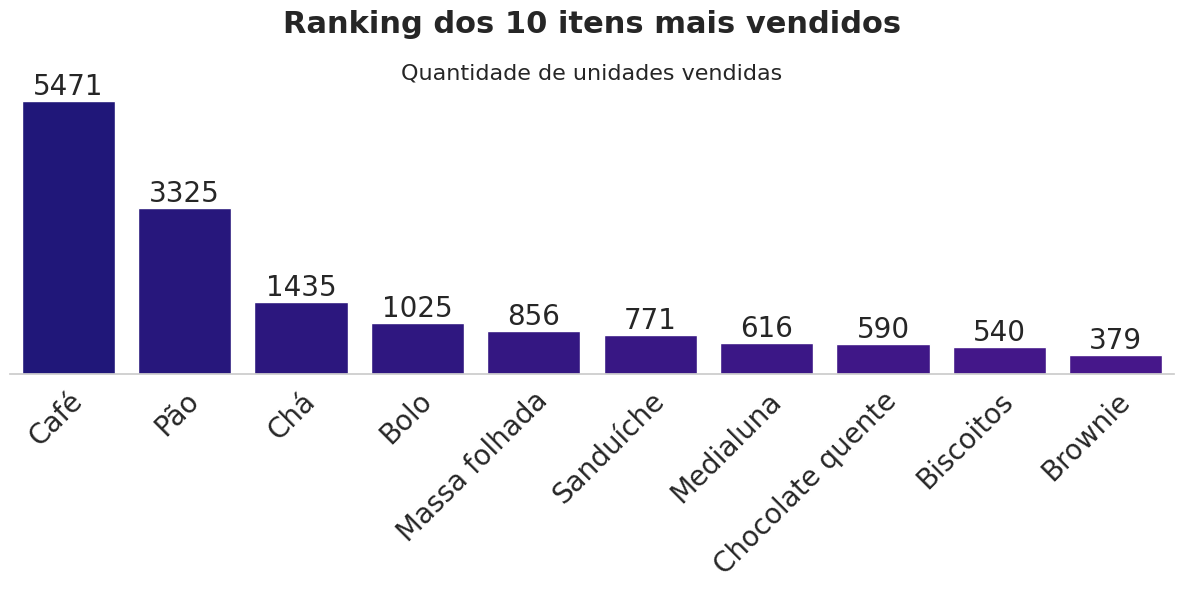

In [ ]:
#Criando a representação gráfica dos itens mais vendidos

ax = sns.countplot(x = 'Item',
                   order = df['Item'].value_counts().index,
                   data = df,
                   palette = 'plasma')

for label in ax.containers:
    ax.bar_label(label, fontsize = 20)

sns.despine(left = True)
plt.xlim(-0.5,9.5) #Delimita quantidade de categorias do eixo x
plt.xticks(fontsize=20, rotation=45,  ha='right', rotation_mode='anchor') #Rotaciona legenda do eixo x
plt.xlabel('') #Remove titulo do eixo x
plt.yticks([]) #Remove legenda do eixo y
plt.ylabel('') #Remove titulo do eixo y
plt.suptitle('Ranking dos 10 itens mais vendidos', fontsize=22, fontweight='bold')
plt.title('Quantidade de unidades vendidas', fontsize=16, fontweight='light', loc='center')
plt.tight_layout()

plt.savefig('Ranking dos 10 itens mais vendidos.png')

In [ ]:
#Imprimindo a frequência somada dos 10 itens campeões de venda

print("Os itens no ranking dos top 10 representam", frequencia_itens.head(10)['Frequência (%)'].sum().round(), "% de todos os itens vendidos")

Os itens no ranking dos top 10 representam 73.0 % de todos os itens vendidos


**Observações:**

> A frequência de aparição dos itens no nosso ranking dos top 10 itens de venda já evidencia a forte concentração de vendas nesses itens.
>Juntos, eles representam 73% das vendas.

###**2. Quais itens podem ser removidos do cardápio para dar espaço para novos pratos?**

Pela forte concentração em vendas nos itens do top 10, já temos uma idea de que a distribuição de venda do restante do cardápio é irrisória.

In [ ]:
#Conferindo a distribuição

frequencia_itens.describe()

Item,Contagem,Frequência (%)
count,94.000000,94.000000
mean,218.159574,1.059574
std,682.878463,3.333322
min,1.000000,0.000000
25%,6.000000,0.000000
50%,15.000000,0.100000
75%,148.250000,0.700000
max,5471.000000,26.700000


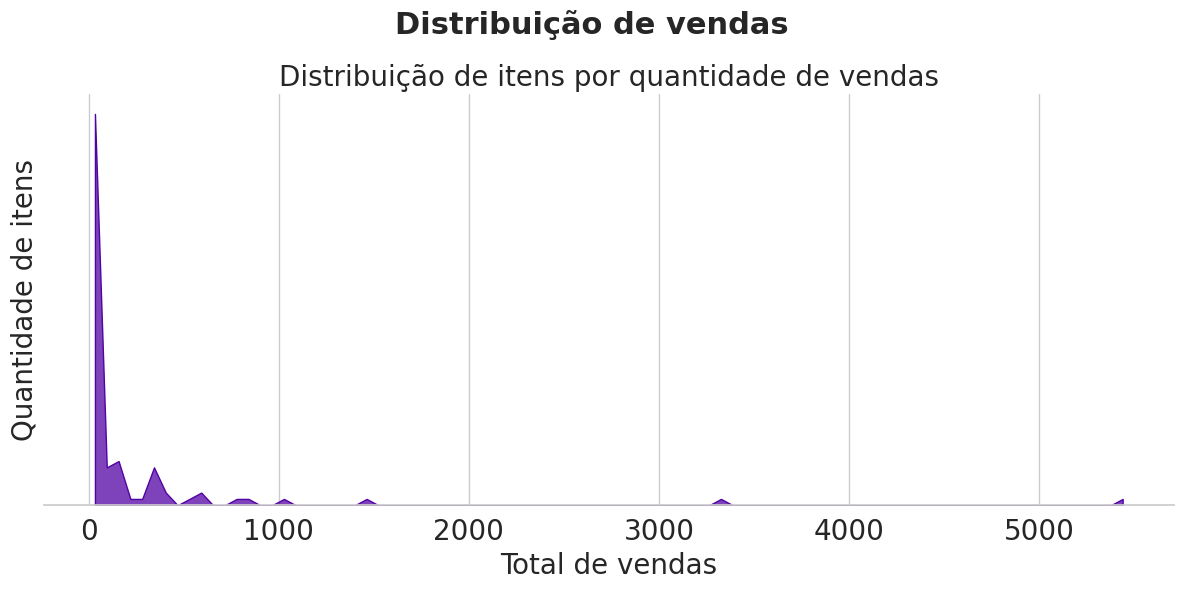

In [ ]:
ax = sns.histplot(x = df['Item'].value_counts(),
                 data = df,
                 element="poly")

sns.despine(left = True)
plt.xlabel('Total de vendas', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks([]) #Remove legenda do eixo y
plt.ylabel('Quantidade de itens', fontsize=20)
plt.suptitle('Distribuição de vendas', fontsize=22, fontweight='bold')
plt.title('Distribuição de itens por quantidade de vendas', fontsize=20, fontweight='light', loc='center')
plt.tight_layout()

plt.savefig('Distribuição de vendas.png')

In [ ]:
#Obtendo a lista de itens com menos de 15 vendas

itens_retirados = frequencia_itens.query('Contagem < 16')
itens_retirados.index

Index(['Batatas fritas', 'Cartão do Dia dos Namorados', 'Doce de leite',
       'Tigelas variadas', 'Biscoito infantil', 'Ovo de pato',
       'Christmas common', 'Tacos/Fajita', 'Whey Protein', 'Chocolates',
       'Cartão-postal', 'Xarope de gengibre', 'Nomad bag',
       'Drinking chocolate spoons ', 'Muesli', 'Argentina Night',
       'Bolo esponja vitoriano', 'Grãos de café', 'Empanadas', 'Crepe',
       'Half slice Monster ', 'Limão e coco', 'Pintxos', 'Mel', 'Cesto',
       'Panetone', 'Mortimer', 'Pipoca simples', 'Pudim de pão',
       'Pedacinhos de caramelo', 'Brioche e salame', 'Cereja seca',
       'Sanduíche de framboesa', 'Creme', 'Fairy Doors', 'Hack the stack',
       'Tigela Nic Pitt', 'Óleo de chimichurri', 'Siblings',
       'Sanduíche de frango', 'O BART', 'Adjustment', 'Bacon', 'Vale-presente',
       'Polenta com ameixa', 'Raw bars', 'Polenta'],
      dtype='object')

##Período do dia

Com as duas primeiras perguntas já respondidas, vamos ao próximo problema:

###**3. Qual período do dia a padaria mais vende?**

Vamos iniciar conhecendo o intervalo de horários em cada período:

In [ ]:
print(
    'O período da manhã começa', df.query('Período_do_Dia == "Manhã"')['Hora_Completa'].min(),
    'e termina', df.query('Período_do_Dia == "Manhã"')['Hora_Completa'].max(),
)

O período da manhã começa 01:21 e termina 11:59


In [ ]:
print(
    'O período da tarde começa', df.query('Período_do_Dia == "Tarde"')['Hora_Completa'].min(),
    'e termina', df.query('Período_do_Dia == "Tarde"')['Hora_Completa'].max(),
)

O período da tarde começa 12:00 e termina 16:59


In [ ]:
print(
    'O período do entardecer começa', df.query('Período_do_Dia == "Entardecer"')['Hora_Completa'].min(),
    'e termina', df.query('Período_do_Dia == "Entardecer"')['Hora_Completa'].max(),
)

O período do entardecer começa 17:00 e termina 20:46


In [ ]:
print(
    'O período da noite começa', df.query('Período_do_Dia == "Noite"')['Hora_Completa'].min(),
    'e termina', df.query('Período_do_Dia == "Noite"')['Hora_Completa'].max(),
)

O período da noite começa 21:42 e termina 23:38


O período da manhã parece ser o que tem o maior intervalo de tempo, começando a operar já de madrugada. Para conferir se realmente é o caso, vamos analisar com mais detalhes os horários das transações do período matutino:

In [ ]:
df_manha = df.query('Período_do_Dia == "Manhã"').sort_values(by='Hora_Completa')
df_manha['Hora_Completa']

8144     01:21
3716     07:29
872      07:32
2644     07:39
2793     07:42
         ...  
14176    11:59
14321    11:59
14322    11:59
13027    11:59
20469    11:59
Name: Hora_Completa, Length: 8404, dtype: object

**Obervação:**

> Observando os demais horários das transações do período da manhã, percebemos que o horário de 01:21 é a única ocorrência de transação feita durante a madrugada. Para efeitos práticos, consideraremos essa transação como um outlier, e vamos considerar que o período da manhã vai de 7:29 até 11:59.

> Assim, os períodos da manhã, tarde e entardecer tem durações aproximadamente iguais.

> O período da noite tem a menor duração entre os períodos.

Conhecido o intervado de horário de cada período, vamos analisar o movimento da padaria em cada um deles.

Podemos responder nossa primeira pergunta tanto com base no número de clientes por período, quanto pelo volume de itens vendidos por período. Vamos então contruir uma tabela com essas duas métricas:

In [ ]:
#Itens vendidos por período

itens_periodo = df['Período_do_Dia'].value_counts()
itens_periodo

Tarde         11569
Manhã          8404
Entardecer      520
Noite            14
Name: Período_do_Dia, dtype: int64

In [ ]:
#Transações por período

df_tickets = df.drop_duplicates('Transação')
clientes_periodo = df_tickets['Período_do_Dia'].value_counts()
clientes_periodo

Tarde         5089
Manhã         4103
Entardecer     261
Noite           12
Name: Período_do_Dia, dtype: int64

In [ ]:
#Contruindo a tabela
tabela_periodo = pd.DataFrame({'Itens_vendidos':itens_periodo, 'Clientes_atendidos':clientes_periodo})
tabela_periodo

,Itens_vendidos,Clientes_atendidos
Tarde,11569,5089
Manhã,8404,4103
Entardecer,520,261
Noite,14,12


Para complementarmos nossa análise, é interessante observar a média de itens vendido por cliente em cada peíodo:

In [ ]:
tabela_periodo['Média_de_itens_por_cliente'] = tabela_periodo['Itens_vendidos'] / tabela_periodo['Clientes_atendidos']
tabela_periodo


,Itens_vendidos,Clientes_atendidos,Média_de_itens_por_cliente
Tarde,11569,5089,2.273335
Manhã,8404,4103,2.048257
Entardecer,520,261,1.992337
Noite,14,12,1.166667


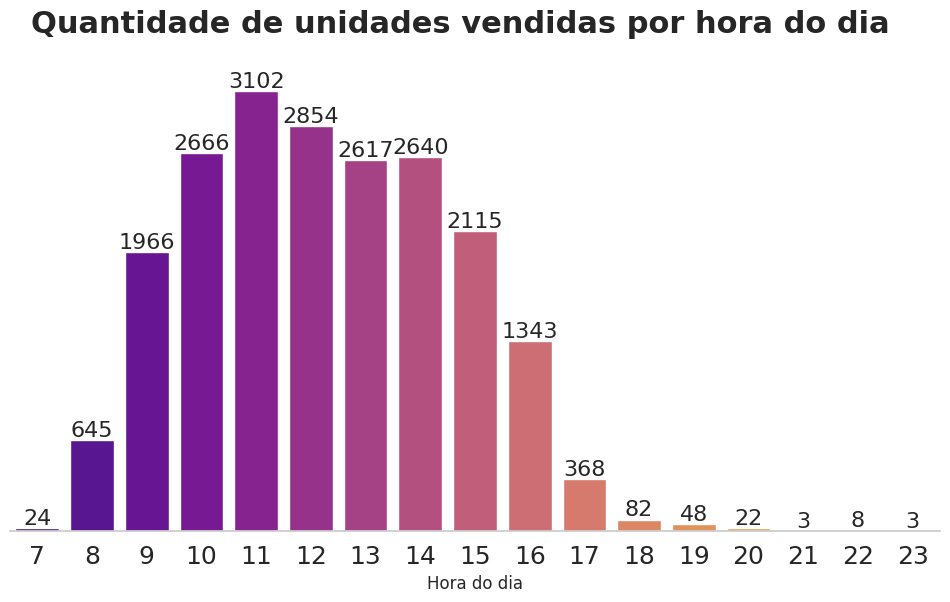

In [ ]:
#Criando a representação gráfica ddo volume de itens vendidos por hora do dia

ax = sns.countplot(x = 'Hora',
                   data = df,
                   palette = 'plasma')

for label in ax.containers:
    ax.bar_label(label, fontsize = 16)

sns.despine(left = True)
plt.xlim(0.5,17.5)
plt.xticks(fontsize=18)
plt.yticks([])
plt.xlabel('Hora do dia')
plt.ylabel('')
plt.suptitle('Quantidade de unidades vendidas por hora do dia', fontsize=22, fontweight='bold')

plt.savefig('Quantidade de unidades vendidas por hora do dia.png')

**Observações:**

> O período da tarde é o mais movimentado na padaria, tanto em número de clientes quanto em volume de itens vendidos, seguido pelo período da manhã.

> Observamos que de tarde é o período com maior média de itens vendido por cliente.

> O período do entardecer e da noite tem movimentação irrisória quando comparado com os demais períodos. Esse pode ser um ponto a ser investigado mais a fundo pela padaria, que pode fazer uma pesquisa de mercado para entender se esse padrão se repete entre seus concorrentes - em caso afirmativo, o negócio pode considerar alterar seu horário de funcionamento, encerrando o expediente assim que acaba o período da tarde. Caso os concorrentes tenham bom volume de vendas no período do entardecer e noite, precisamos investigar a causa do nosso estabelecimento não performar bem nesses períodos frente a concorrência - temos o mesmo público alvo? A localização interfere no resultado? O cardápio está adequado para o período?

##Itens X Período

Agora que entendemos quais os períodos do dia mais vendem, podemos revisitar nossa primeira pergunta e entender quais os itens mais vendidos por período.

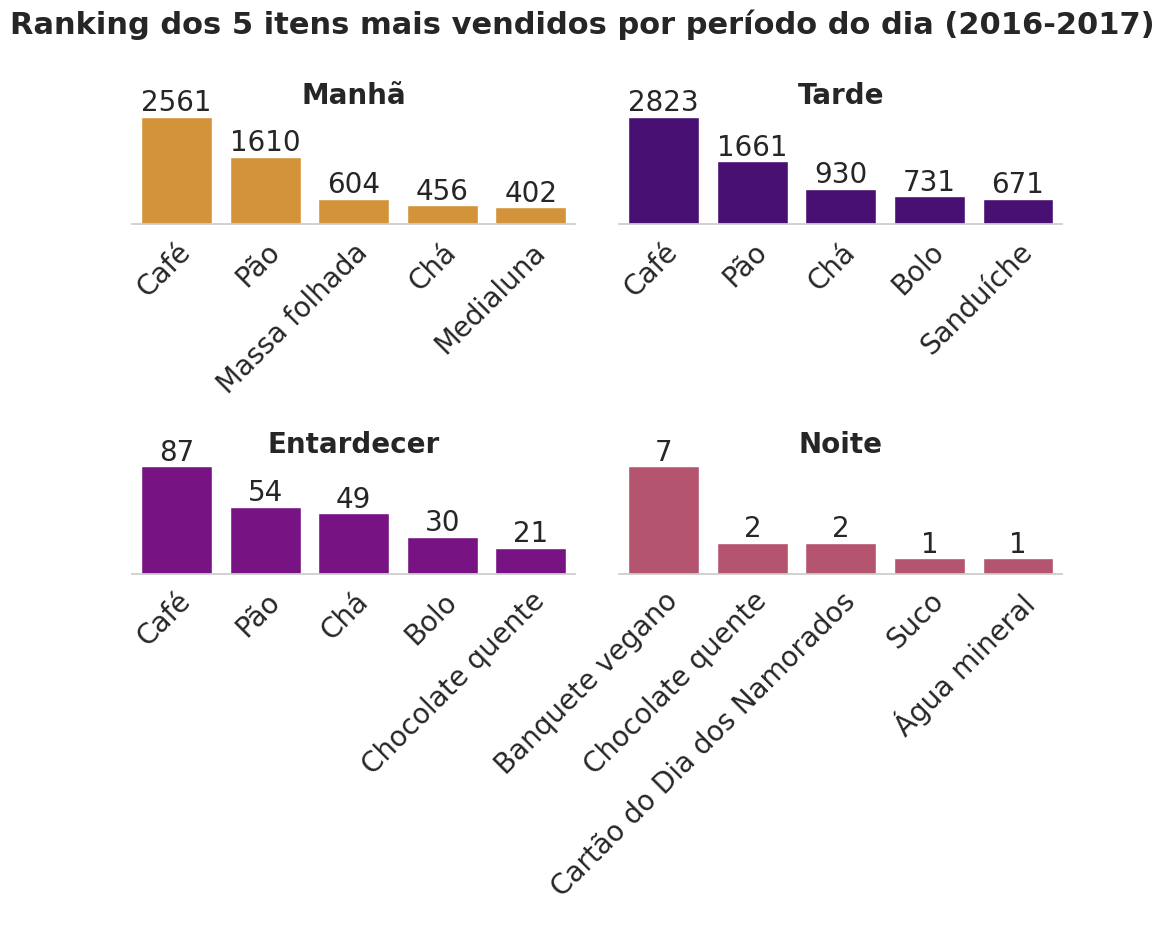

In [ ]:
#Criando a representação gráfica dos itens mais vendidos por período

fig, axes = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.1, # the amount of width reserved for space between subplots
                    hspace=2.1) # the amount of height reserved for space between subplots
plt.setp(axes, yticks=[])

fig.suptitle('Ranking dos 5 itens mais vendidos por período do dia (2016-2017)',
             y = 1.05,
             fontsize=22,
             fontweight='bold')

ax1 = sns.countplot(x = 'Item',
                   data = df.query('Período_do_Dia == "Manhã"'),
                   order = df.query('Período_do_Dia == "Manhã"')['Item'].value_counts().index,
                   color = '#ec9720',
                   ax=axes[0,0])

for label in ax1.containers:
    ax1.bar_label(label, fontsize = 20, fontweight='light')

sns.despine(left = True)
ax1.set_title ("Manhã", fontsize=20, fontweight='bold')
ax1.set_xlim(-0.5,4.5)
ax1.tick_params(axis='x', labelsize=20, rotation=45)
ax1.set_xticklabels(ax1.get_xticklabels(), ha='right', rotation_mode='anchor')
ax1.set_yticks([])
ax1.set_xlabel(' ')
ax1.set_ylabel(' ')

ax2 = sns.countplot(x = 'Item',
                   data = df.query('Período_do_Dia == "Tarde"'),
                   order = df.query('Período_do_Dia == "Tarde"')['Item'].value_counts().index,
                   color = '#4b0082',
                   ax=axes[0,1])

for label in ax2.containers:
    ax2.bar_label(label, fontsize = 20, fontweight='light')

ax2.set_title ("Tarde", fontsize=20, fontweight='bold')
ax2.set_xlim(-0.5,4.5)
ax2.tick_params(axis='x', labelsize=20, rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), ha='right', rotation_mode='anchor')
ax2.set_yticks([])
ax2.set_xlabel(' ')
ax2.set_ylabel(' ')

ax3 = sns.countplot(x = 'Item',
                   data = df.query('Período_do_Dia == "Entardecer"'),
                   order = df.query('Período_do_Dia == "Entardecer"')['Item'].value_counts().index,
                   color = '#870096',
                   ax=axes[1,0])

for label in ax3.containers:
    ax3.bar_label(label, fontsize = 20, fontweight='light')

ax3.set_title ("Entardecer", fontsize=20, fontweight='bold')
ax3.set_xlim(-0.5,4.5)
ax3.tick_params(axis='x', labelsize=20, rotation=45)
ax3.set_xticklabels(ax3.get_xticklabels(), ha='right', rotation_mode='anchor')
ax3.set_yticks([])
ax3.set_xlabel(' ')
ax3.set_ylabel(' ')

ax4 = sns.countplot(x = 'Item',
                   data = df.query('Período_do_Dia == "Noite"'),
                   order = df.query('Período_do_Dia == "Noite"')['Item'].value_counts().index,
                   color = '#c44467',
                   ax=axes[1,1])

for label in ax4.containers:
    ax4.bar_label(label, fontsize = 20, fontweight='light')

ax4.set_title ("Noite", fontsize=20, fontweight='bold')
ax4.set_xlim(-0.5,4.5)
ax4.tick_params(axis='x', labelsize=20, rotation=45)
ax4.set_xticklabels(ax4.get_xticklabels(), ha='right', rotation_mode='anchor')
ax4.set_yticks([])
ax4.set_xlabel(' ')
ax4.set_ylabel(' ')

plt.savefig('Ranking dos 5 itens mais vendidos por período do dia (2016-2017).png', bbox_inches='tight')

Apenas observando os cinco primeiro itens mais vendidos de cada período, observamos que os produtos mais vendidos são diferentes entre eles.

Podemos investigar mais a fundo a dinâmica dos itens mais vendidos por período versus o ranking geral. Para essa análise, desconsideraremos os períodos do entardecer e da noite, já que os mesmos tem volume de vendas muito baixo.

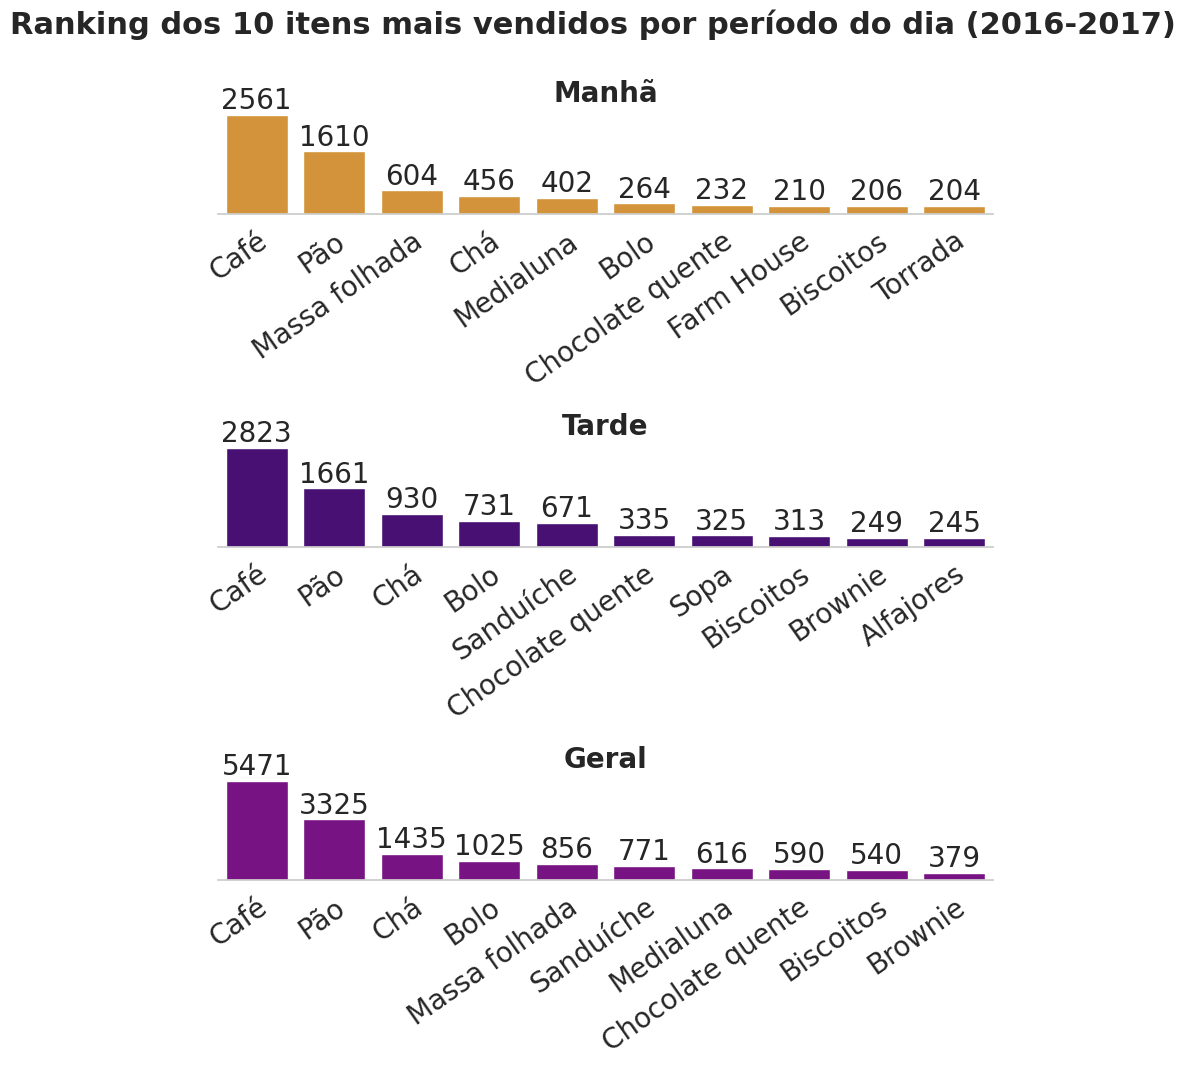

In [ ]:
#Criando a representação gráfica da comparação de itens mais vendidos por período

fig, axes = plt.subplots(3, 1, figsize = (10,10))
plt.subplots_adjust(wspace=0.1,hspace=2.2)
plt.setp(axes, yticks=[])

fig.suptitle('Ranking dos 10 itens mais vendidos por período do dia (2016-2017)', fontsize=22, fontweight='bold')

ax1 = sns.countplot(x = 'Item',
                   data = df.query('Período_do_Dia == "Manhã"'),
                   order = df.query('Período_do_Dia == "Manhã"')['Item'].value_counts().index,
                   color = '#ec9720',
                   ax=axes[0])

for label in ax1.containers:
    ax1.bar_label(label, fontsize = 20, fontweight='light')

sns.despine(left = True)
ax1.set_title ("Manhã", fontsize=20, fontweight='bold')
ax1.set_xlim(-0.5,9.5)
ax1.tick_params(axis='x', labelsize=20, rotation=35)
ax1.set_xticklabels(ax1.get_xticklabels(), ha='right', rotation_mode='anchor')
ax1.set_yticks([])
ax1.set_xlabel(' ')
ax1.set_ylabel(' ')

ax2 = sns.countplot(x = 'Item',
                   data = df.query('Período_do_Dia == "Tarde"'),
                   order = df.query('Período_do_Dia == "Tarde"')['Item'].value_counts().index,
                   color = '#4b0082',
                   ax=axes[1])

for label in ax2.containers:
    ax2.bar_label(label, fontsize = 20, fontweight='light')

ax2.set_title ("Tarde", fontsize=20, fontweight='bold')
ax2.set_xlim(-0.5,9.5)
ax2.tick_params(axis='x', labelsize=20, rotation=35)
ax2.set_xticklabels(ax2.get_xticklabels(), ha='right', rotation_mode='anchor')
ax2.set_yticks([])
ax2.set_xlabel(' ')
ax2.set_ylabel(' ')

ax3 = sns.countplot(x = 'Item',
                   data = df,
                   order = df['Item'].value_counts().index,
                   color = '#870096',
                   ax=axes[2])

for label in ax3.containers:
    ax3.bar_label(label, fontsize = 20, fontweight='light')

ax3.set_title ("Geral", fontsize=20, fontweight='bold')
ax3.set_xlim(-0.5,9.5)
ax3.tick_params(axis='x', labelsize=20, rotation=35)
ax3.set_xticklabels(ax3.get_xticklabels(), ha='right', rotation_mode='anchor')
ax3.set_yticks([])
ax3.set_xlabel(' ')
ax3.set_ylabel(' ')

plt.savefig('Ranking dos 10 itens mais vendidos por período do dia (2016-2017).png', bbox_inches='tight')

Ao analisarmos o ranking dos 10 itens mais vendido por período, observamos que os itens mais frequentes são diferentes do entre a manhã, a tarde e o ranking geral:

> Massas folhadas, que aparecem em quinto lugar no ranking geral, não aparece no ranking dos itens da tarde, e sobe para terceiro colocado no ranking da manhã.

> A Medialuna também sai do ranking dos itens mais vendidos no período da tarde, e sobe para quinto no período da manhã.

> Sopa e alfajores, que não aparecem no ranking geral, estão presentes no ranking da tarde.

>Torrada e Farm House, que não aparecem no ranking geral, estão presentes no ranking da manhã.

>Sanduíches e brownies, presentes no ranking geral e no ranking da tarde, não aparecem no ranking da manhã.

> Os dois primeiros itens são consistentes entre o ranking geral e o ranking da tarde.

##To be continued

Para facilitar a leitura e navegação no notebook, vamos dividir nosso projeto em diferentes noteboks.

Finalizaremos a primeira etapa de análise aqui, e continuaremos a responder nossas perguntas de negócio em notebooks futuros.

Exportaremos o DF já tratado para ser utilizado nas próximas análises.

In [ ]:
df.to_csv('df_tratado.csv', index = False)